In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-lognormal-1st"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_5/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

11:12 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5/'
11:12 bilby INFO    : Search parameters:
11:12 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
11:12 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
11:12 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
11:12 bilby INFO    :   H0 = 67.4
11:12 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:62: RuntimeWarning: divide by zero encountered in log
11:13 bilby INFO    : Single likelihood evaluation took 1.109e-01 s


0it [00:00, ?it/s]

11:13 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f2cebbb75e0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
11:13 bilby INFO    : Checkpoint every check_point_delta_t = 60s
11:13 bilby INFO    : Using dynesty version 1.0.1
11:13 bilby INFO    : Using the bilby-implemented rwalk sampl

1393it [02:55,  5.92it/s, bound:0 nc:  3 ncall:7.6e+03 eff:18.4% logz=-1816.15+/-0.15 dlogz:58.493>0.1]    

11:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1718it [04:05,  2.98it/s, bound:0 nc: 50 ncall:1.5e+04 eff:11.7% logz=-1800.36+/-0.15 dlogz:42.399>0.1]

11:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1942it [05:09,  3.94it/s, bound:9 nc: 27 ncall:2.1e+04 eff:9.1% logz=-1791.93+/-0.15 dlogz:33.505>0.1] 

11:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2215it [06:14,  4.13it/s, bound:37 nc: 28 ncall:3.0e+04 eff:7.4% logz=-1785.01+/-0.15 dlogz:26.733>0.1]

11:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2462it [07:21,  3.78it/s, bound:65 nc: 34 ncall:3.9e+04 eff:6.3% logz=-1779.63+/-0.16 dlogz:20.856>0.1]

11:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2675it [08:22,  3.56it/s, bound:90 nc: 38 ncall:4.7e+04 eff:5.7% logz=-1775.71+/-0.16 dlogz:16.606>0.1]

11:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2893it [09:28,  3.33it/s, bound:118 nc: 40 ncall:5.6e+04 eff:5.2% logz=-1772.69+/-0.16 dlogz:13.264>0.1]

11:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3106it [10:32,  3.39it/s, bound:146 nc: 40 ncall:6.5e+04 eff:4.8% logz=-1770.30+/-0.16 dlogz:10.454>0.1]

11:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3318it [11:35,  3.40it/s, bound:174 nc: 80 ncall:7.4e+04 eff:4.5% logz=-1768.31+/-0.17 dlogz:8.038>0.1] 

11:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3531it [12:38,  3.45it/s, bound:202 nc: 40 ncall:8.3e+04 eff:4.3% logz=-1766.66+/-0.17 dlogz:6.041>0.1]

11:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3744it [13:41,  3.48it/s, bound:230 nc: 40 ncall:9.2e+04 eff:4.1% logz=-1765.50+/-0.17 dlogz:4.463>0.1]

11:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3956it [14:44,  3.41it/s, bound:257 nc: 40 ncall:1.0e+05 eff:3.9% logz=-1764.69+/-0.17 dlogz:3.262>0.1]

11:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:27 bilby INFO    : Writing 154 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4173it [15:49,  3.48it/s, bound:285 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1764.11+/-0.17 dlogz:2.311>0.1]

11:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:28 bilby INFO    : Writing 219 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4388it [16:53,  3.39it/s, bound:313 nc: 80 ncall:1.2e+05 eff:3.7% logz=-1763.71+/-0.17 dlogz:1.601>0.1]

11:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:29 bilby INFO    : Writing 320 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4599it [17:57,  3.34it/s, bound:341 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1763.42+/-0.17 dlogz:1.081>0.1]

11:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:31 bilby INFO    : Writing 523 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4818it [19:01,  3.49it/s, bound:369 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1763.21+/-0.17 dlogz:0.699>0.1]

11:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:32 bilby INFO    : Writing 799 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5032it [20:06,  3.41it/s, bound:397 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1763.06+/-0.17 dlogz:0.454>0.1]

11:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:33 bilby INFO    : Writing 1258 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5253it [21:11,  3.46it/s, bound:425 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1762.95+/-0.17 dlogz:0.287>0.1]

11:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:34 bilby INFO    : Writing 1668 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5466it [22:17,  3.38it/s, bound:453 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.88+/-0.17 dlogz:0.184>0.1]

11:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:35 bilby INFO    : Writing 1679 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5677it [23:21,  3.40it/s, bound:481 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1762.83+/-0.17 dlogz:0.119>0.1]

11:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:36 bilby INFO    : Writing 1672 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5736it [23:40,  3.08it/s, bound:488 nc: 80 ncall:1.8e+05 eff:3.3% logz=-1762.82+/-0.17 dlogz:0.105>0.1]

11:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_resume.pickle
11:36 bilby INFO    : Writing 1647 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_5//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
11:36 bilby INFO    : Starting to close worker pool.
11:36 bilby INFO    : Finished closing worker pool.


5761it [23:43,  4.05it/s, bound:492 nc:  1 ncall:1.8e+05 eff:3.6% logz=-1762.73+/-0.18 dlogz:0.000>0.1]



11:36 bilby INFO    : Sampling time: 0:21:52.852553
11:36 bilby INFO    : Summary of results:
nsamples: 6261
ln_noise_evidence:    nan
ln_evidence: -1762.731 +/-  0.178
ln_bayes_factor:    nan +/-  0.178



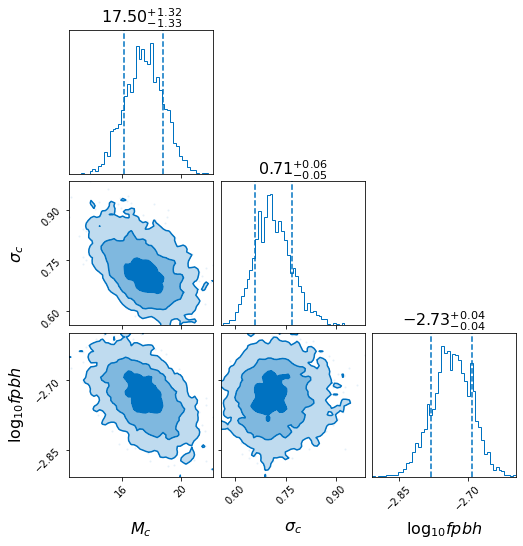

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
